In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import joblib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


## Checking data

In [4]:
data_train = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv")

In [6]:
data_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
data_train["House_Ownership"].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [8]:
print("Null Values: ")
print(data_train.isnull().sum())
print("Duplicates",data_train.duplicated().sum())

Null Values: 
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64
Duplicates 0


In [9]:
data_train.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [10]:
data_train.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## Graphs

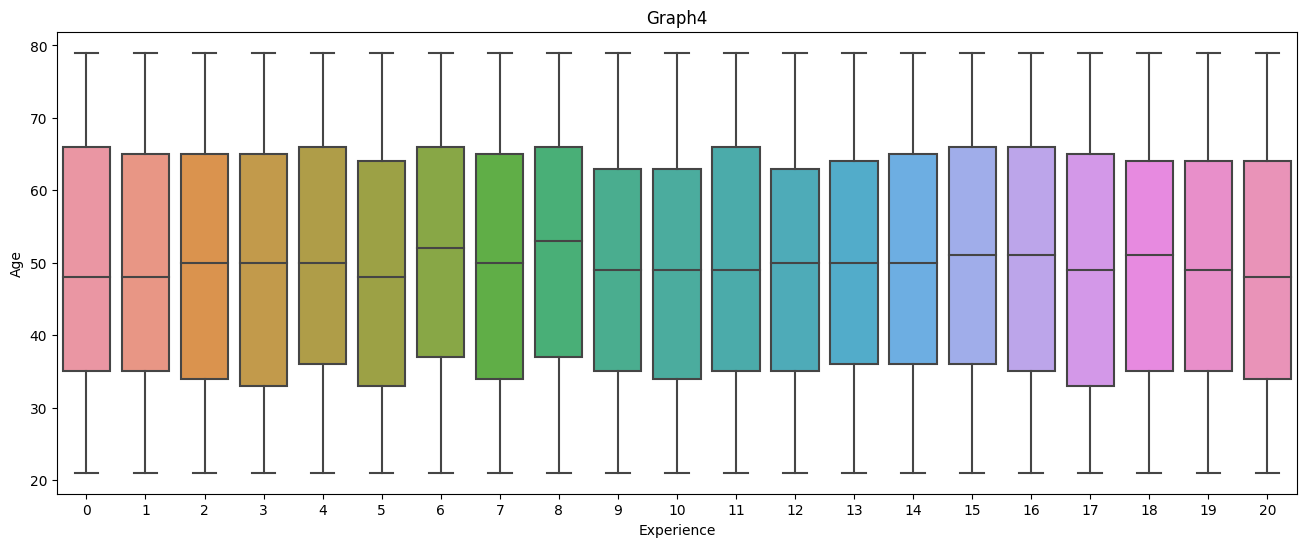

In [11]:
x = data_train['Experience']
y = data_train['Age']
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x=x, y=y)
ax.set(xlabel = 'Experience',ylabel='Age')
plt.title('Graph4')
plt.show()

Text(0.5, 1.0, 'Graph3')

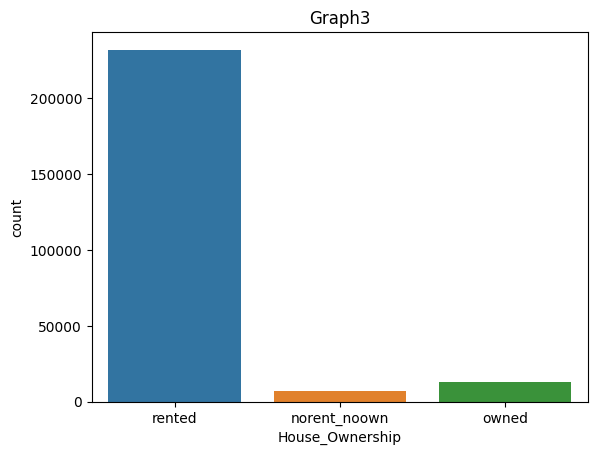

In [12]:
sns.countplot(x =data_train['House_Ownership']) 
plt.title('Graph3')

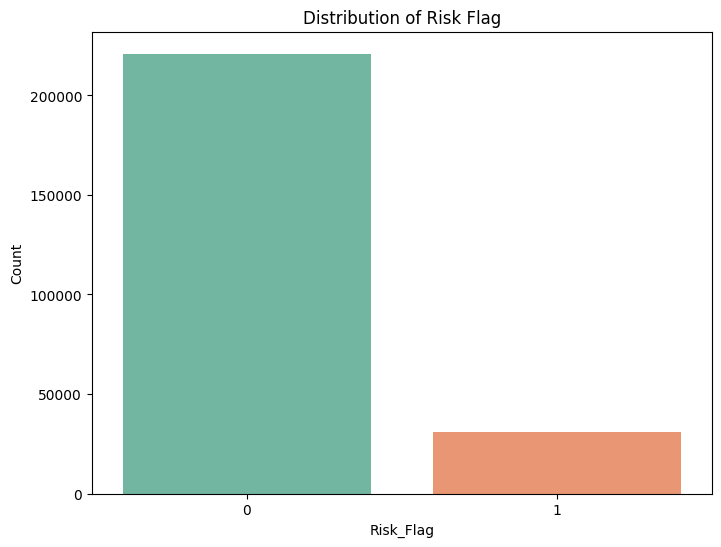

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_train, x='Risk_Flag', palette='Set2')
plt.title('Distribution of Risk Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Count')
plt.show()

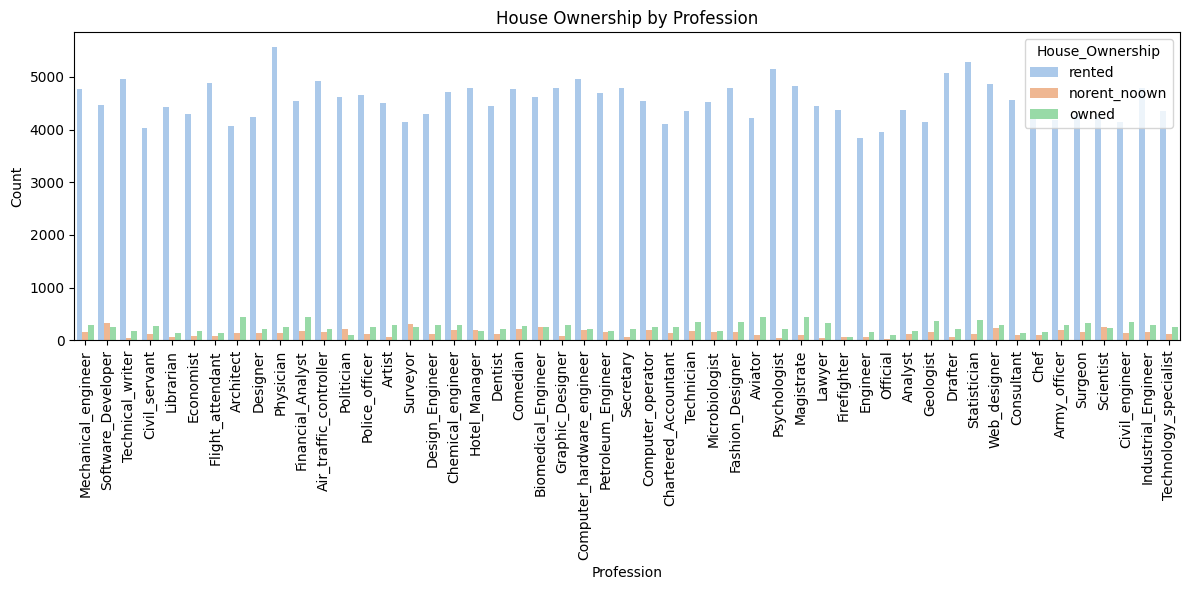

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_train, x='Profession', hue='House_Ownership', palette='pastel')
plt.title('House Ownership by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='House_Ownership', loc='upper right')
plt.tight_layout()
plt.show()

## Editing the dataset

In [15]:
data_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [16]:
data_train["Married/Single"].unique()

array(['single', 'married'], dtype=object)

In [17]:
 data_train["Married/Single"] = data_train["Married/Single"].map({'single': 0 , 'marries' : 1 })

In [18]:
data_train["House_Ownership"] = data_train["House_Ownership"].map({'rented': 0 , 'norent_noown' : 1 , 'owned' : 2 })

In [19]:
data_train['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
data_train['Car_Ownership'] = data_train['Car_Ownership'].map({'no':0 , 'yes':1})

In [21]:
data_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0.0,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,0.0,0,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,NaN,0,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,0.0,0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,0.0,0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [22]:
data_train = data_train.drop(columns=['Profession','CITY','STATE','Id'])

In [23]:
data_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0.0,0,0,3,13,0
1,7574516,40,10,0.0,0,0,9,13,0
2,3991815,66,4,NaN,0,0,4,10,0
3,6256451,41,2,0.0,0,1,2,12,1
4,5768871,47,11,0.0,0,0,3,14,1


## Splitting Dataset

In [24]:
x = data_train.drop("Risk_Flag", axis=1)
y = data_train["Risk_Flag"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
x.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,0.0,0,0,3,13
1,7574516,40,10,0.0,0,0,9,13
2,3991815,66,4,NaN,0,0,4,10
3,6256451,41,2,0.0,0,1,2,12
4,5768871,47,11,0.0,0,0,3,14


In [26]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Risk_Flag, dtype: int64

## Model Building

In [27]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [30]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20],
    'max_features': [None],
    'min_samples_split': [2, 10],
    'n_estimators': [100]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(estimator = rfc, param_grid = param_grid, n_jobs = -1, verbose = 5)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(clf.best_params_)

print(clf.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy:  0.8954301727752156
{'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=10)


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', bootstrap = True, max_depth = 20, max_features = None, min_samples_split=10,n_estimators = 100, random_state=100)

clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)
print("Scaling: ",accuracy_score(y_test,y_pred))
print("Score Details:") 
print(f"Recall: { recall_score(y_test, y_pred) }")
print(f"Precision: { precision_score(y_test, y_pred) }")
print(f"F1-Score: { f1_score(y_test, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test, y_pred) }")

Scaling:  0.8956728965775944
Score Details:
Recall: 0.3730089270085769
Precision: 0.6502898992981385
F1-Score: 0.4740823136818687
Accuracy score: 0.8956728965775944
AUC Score: 0.6720369585807919
[CV 1/5] END bootstrap=True, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100;, score=0.877 total time=  37.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100;, score=0.877 total time=  36.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100;, score=0.877 total time=  36.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100;, score=0.876 total time=  35.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=None, min_samples_split=10, n_estimators=100;, score=0.877 total time=  35.8s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=None, min_samples_split=2, n_estimators=100;, score=0.895 total time=  53.7s
[CV 

## Dumping model and predicting

In [33]:
joblib.dump(clf, 'model.joblib')

['model.joblib']

In [42]:
model = joblib.load('model.joblib')

# Define your input features
Income = 1303834
Age = 23
Experience = 3
Married_Single = 0 
House_Ownership = 1
Car_Ownership = 0
CURRENT_JOB_YRS = 3
CURRENT_HOUSE_YRS = 13

model.feature_names_in_ = None  

prediction = model.predict([[Income, Age, Experience, Married_Single, House_Ownership, Car_Ownership, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS]])

model.feature_names_in_ = X_train.columns  


In [43]:
prediction

array([0])